# Forecast Stock Prices using All tickers of S&P 500

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor, RANSACRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib notebook

C:\Users\kenneth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\kenneth\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Select Stock Ticker to Forecast from S&P 500 Index

In [2]:
ticker = '^GSPC'
forecast_period = 30

### Update to latest S&P tickers, Download Prices and create Adj Close file for all tickers

In [3]:
#un commenting and running the following will update S&P tickers and upload all prices
#%run download_prices.ipnb

###  View adj close file with prices for all tickers

In [4]:
df = pd.read_csv('adj_close.csv', index_col=0, parse_dates=True)
df=df.dropna(subset=[(ticker)]).fillna(method='bfill').fillna(method='ffill')
df.head(5)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRT,XRX,XYL,YUM,ZBH,ZION,ZTS,^GSPC
2000-01-03,45.08,18.32,13.21,3.49,27.19,3.02,18.25,9.75,11.5,16.27,...,22.12,6.69,15.64,53.39,21.6,4.44,113.65,41.86,29.46,1455.22
2000-01-04,41.64,18.32,13.21,3.19,27.19,2.82,17.81,9.47,11.5,14.91,...,21.70,6.69,15.64,50.90,21.6,4.35,113.65,39.83,29.46,1399.42
2000-01-05,39.06,18.32,13.21,3.24,27.19,3.04,18.00,9.46,11.5,15.20,...,22.88,6.80,15.64,53.52,21.6,4.37,113.65,39.79,29.46,1402.11
2000-01-06,37.57,18.32,13.21,2.96,27.19,3.27,18.03,9.79,11.5,15.33,...,24.06,6.81,15.64,52.42,21.6,4.34,113.65,40.35,29.46,1403.45
2000-01-07,40.70,18.32,13.21,3.10,27.19,3.69,17.94,9.89,11.5,16.07,...,23.99,6.80,15.64,53.66,21.6,4.24,113.65,40.45,29.46,1441.47


###  Prepare data for machine Learning

In [5]:
y = df[ticker].shift(-forecast_period)[:-forecast_period]
X = preprocessing.scale(df)
X_forecast = df[-forecast_period:]
X = df[:-forecast_period]
last_date = df.iloc[-1].name
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

(4921,)
(4951, 516)
(30, 516)
(4921, 516)


### Function to draw Graph

In [6]:
def draw_graph(ticker, forecast, last_date):
    df['Forecast']=np.nan
    last_unix = last_date
    next_unix = last_unix + datetime.timedelta(days=1)

    for i in forecast:
        next_date = next_unix
        next_unix += datetime.timedelta(days=1)
        df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    df[ticker].tail(500).plot()
    df['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

### Predict using Linear Regression

Accuracy:  0.9972%
Predicted Prices for ^GSPC :  [2899.57 2875.5  2801.36 2834.84 2855.96 2838.28 2785.07 2715.47 2730.77
 2748.02 2764.49 2777.54 2762.36 2761.7  2704.53 2700.28 2634.84 2653.32
 2668.75 2749.52 2744.2  2749.94 2721.36 2703.02 2679.61 2664.79 2656.02
 2673.82 2680.13 2689.32]


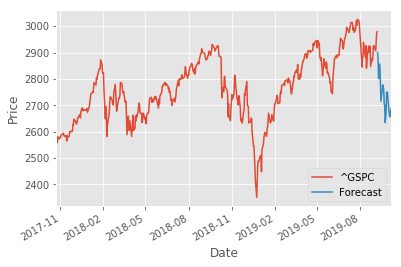

In [15]:
clf_lr=LinearRegression(n_jobs=-1)
clf_lr.fit(X_train, y_train)
accuracy=clf_lr.score(X_test, y_test)
print('Accuracy: ', str(accuracy.round(4))+'%')
forecast_lr = clf_lr.predict(X_forecast)
print('Predicted Prices for '+ticker+' : ',forecast_lr.round(2))
draw_graph(ticker, forecast_lr, last_date)

### Predict using Bayesian Ridge Regression 

Accuracy:  0.9972%
Predicted Prices for ^GSPC :  [2916.51 2903.46 2835.45 2874.71 2883.51 2841.62 2802.71 2761.78 2788.7
 2770.18 2789.04 2817.19 2805.31 2805.02 2751.63 2730.61 2684.4  2702.45
 2703.01 2756.9  2748.87 2768.07 2762.91 2756.41 2747.45 2741.05 2740.72
 2754.34 2766.23 2769.91]


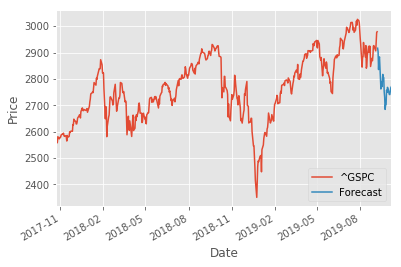

In [16]:
clf_br = BayesianRidge()
clf_br.fit(X_train, y_train)
accuracy=clf_br.score(X_test, y_test)
print('Accuracy: ', str(accuracy.round(4))+'%')
forecast_br = clf_br.predict(X_forecast)
print('Predicted Prices for '+ticker+' : ',forecast_br.round(2))
draw_graph(ticker, forecast_br, last_date)

### Predict using using RANSAC

Accuracy:  0.9954%
Predicted Prices for ^GSPC :  [2975.06 2963.22 2899.56 2922.62 2991.43 2963.82 2946.03 2891.67 2915.38
 2923.5  2936.95 2916.13 2913.28 2927.49 2893.58 2922.5  2865.54 2931.83
 2941.01 3004.99 2994.28 2984.55 2945.23 2933.38 2968.18 2974.14 2921.65
 2917.03 2887.97 2947.05]


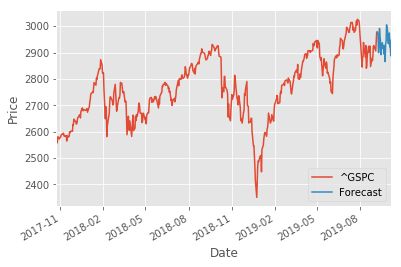

In [17]:
clf_ransac = RANSACRegressor()
clf_ransac.fit(X_train, y_train)
accuracy=clf_ransac.score(X_test, y_test)
print('Accuracy: ', str(accuracy.round(4))+'%')
forecast_ransac = clf_ransac.predict(X_forecast)
print('Predicted Prices for '+ticker+' : ',forecast_ransac.round(2))
draw_graph(ticker, forecast_ransac, last_date)

### Predict using K Nearest Neighbors Regressor

Accuracy:  0.9961%
Predicted Prices for ^GSPC :  [2977.36 2977.36 2977.36 2952.58 2952.58 2931.34 2985.86 2996.78 2948.58
 2911.72 2931.34 2931.34 2930.24 2948.58 2948.58 2931.34 2952.58 2931.34
 2952.58 2952.58 2948.58 2931.34 2931.34 2931.34 2952.58 2952.58 2952.58
 2952.58 2977.36 2977.36]


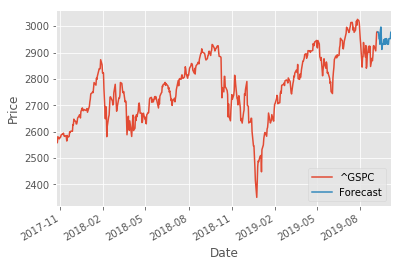

In [18]:
clf_KNR = KNeighborsRegressor(n_neighbors=2)
clf_KNR.fit(X_train, y_train)
accuracy=clf_KNR.score(X_test, y_test)
print('Accuracy: ', str(accuracy.round(4))+'%')
forecast_KNR = clf_KNR.predict(X_forecast)
print('Predicted Prices for '+ticker+' : ',forecast_KNR.round(2))
draw_graph(ticker, forecast_KNR, last_date)

### Predict using Gaussian Process Regression

Accuracy:  0.997%
Predicted Prices for ^GSPC :  [2933.63 2930.49 2880.63 2919.43 2932.66 2893.42 2848.07 2836.07 2871.49
 2844.83 2847.54 2857.02 2852.75 2843.35 2819.64 2806.91 2775.57 2799.72
 2793.11 2824.1  2813.29 2837.26 2849.36 2848.93 2854.53 2851.77 2850.36
 2863.29 2878.15 2879.22]


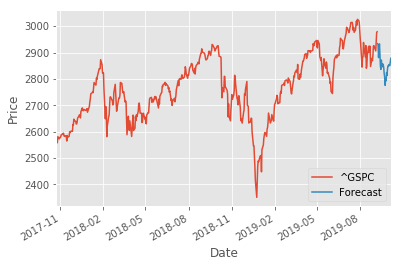

In [19]:
kernel = DotProduct() + WhiteKernel()
clf_GPR = GaussianProcessRegressor(kernel=kernel,random_state=0)
clf_GPR.fit(X_train, y_train)
accuracy=clf_GPR.score(X_test, y_test)
print('Accuracy: ', str(accuracy.round(4))+'%')
forecast_GPR = clf_GPR.predict(X_forecast)
print('Predicted Prices for '+ticker+' : ',forecast_GPR.round(2))
draw_graph(ticker, forecast_GPR, last_date)

### Predict using Decision Tree Regressor

Accuracy:  0.9958%
Predicted Prices for ^GSPC :  [2978.71 2847.11 2937.78 2937.78 3005.47 2980.38 3005.47 3005.47 3005.47
 2976.61 3005.47 3005.47 2975.95 2999.91 2999.91 2964.33 2975.95 2975.95
 2975.95 2975.95 2964.33 2964.33 2964.33 2975.95 2975.95 2975.95 2964.33
 2975.95 2976.61 2976.61]


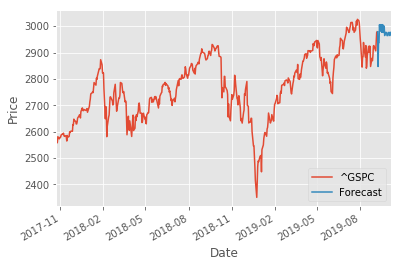

In [20]:
clf_tree = tree.DecisionTreeRegressor()
clf_tree.fit(X_train, y_train)
accuracy=clf_tree.score(X_test, y_test)
print('Accuracy: ', str(accuracy.round(4))+'%')
forecast_tree = clf_tree.predict(X_forecast)
print('Predicted Prices for '+ticker+' : ',forecast_tree.round(2))
draw_graph(ticker, forecast_tree, last_date)

### Predict using Gradient Boosting Regressor

Accuracy:  0.9917%
Predicted Prices for ^GSPC :  [2882.5  2882.5  2882.5  2882.5  2882.5  2882.5  2873.04 2882.5  2882.5
 2882.5  2783.3  2783.3  2783.3  2783.3  2783.3  2783.3  2783.3  2783.3
 2783.3  2783.3  2783.3  2783.3  2783.3  2783.3  2783.3  2783.3  2783.3
 2783.3  2783.3  2783.3 ]


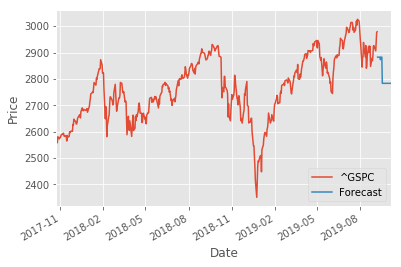

In [21]:
clf_GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')
clf_GBR.fit(X_train, y_train)
accuracy=clf_GBR.score(X_test, y_test)
print('Accuracy: ', str(accuracy.round(4))+'%')
forecast_GBR = clf_GBR.predict(X_forecast)
print('Predicted Prices for '+ticker+' : ',forecast_GBR.round(2))
draw_graph(ticker, forecast_GBR, last_date)